<a href="https://colab.research.google.com/github/SauleRub/DI_Bootcamp/blob/main/Week11/Day5/Week11Day5_DailyChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

# Step 1: Create synthetic scientific dataset
np.random.seed(0)
n_entries = 1000
time = np.linspace(0, 100, n_entries)

temperature = 20 + 5 * np.sin(np.pi * time / 50) + np.random.normal(0, 0.5, n_entries)
pressure = 1013 + 20 * np.cos(np.pi * time / 25) + np.random.normal(0, 1, n_entries)
chemical_concentration = 5 + 2 * np.sin(np.pi * time / 10) + np.random.normal(0, 0.2, n_entries)

ninja_data = pd.DataFrame({
    'Time': time,
    'Temperature': temperature,
    'Pressure': pressure,
    'Chemical Concentration': chemical_concentration
})

ninja_data.head()

,Time,Temperature,Pressure,Chemical Concentration
0,0.0000,20.882026,1033.555963,4.693416
1,0.1001,20.231526,1033.890892,4.720490
2,0.2002,20.552262,1032.571356,5.134934
3,0.3003,21.214783,1033.090475,4.996730
4,0.4004,21.059555,1033.202742,5.234754


In [2]:
# Step 2.1: Normalize the data (excluding Time)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_to_scale = ['Temperature', 'Pressure', 'Chemical Concentration']
ninja_scaled = pd.DataFrame(scaler.fit_transform(ninja_data[features_to_scale]),
                            columns=[f'{col} (Normalized)' for col in features_to_scale])

ninja_scaled['Time'] = ninja_data['Time']
ninja_scaled.head()

,Temperature (Normalized),Pressure (Normalized),Chemical Concentration (Normalized),Time
0,0.253181,1.445618,-0.206395,0.0000
1,0.071129,1.469211,-0.187538,0.1001
2,0.160892,1.376261,0.101115,0.2002
3,0.346308,1.412828,0.004858,0.3003
4,0.302865,1.420736,0.170638,0.4004


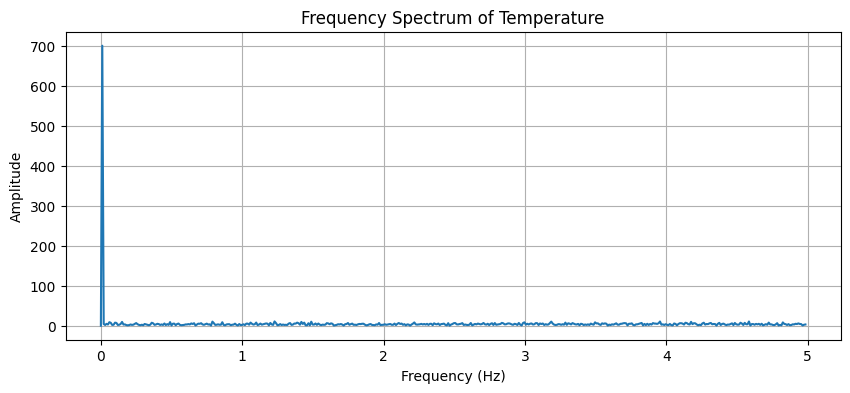

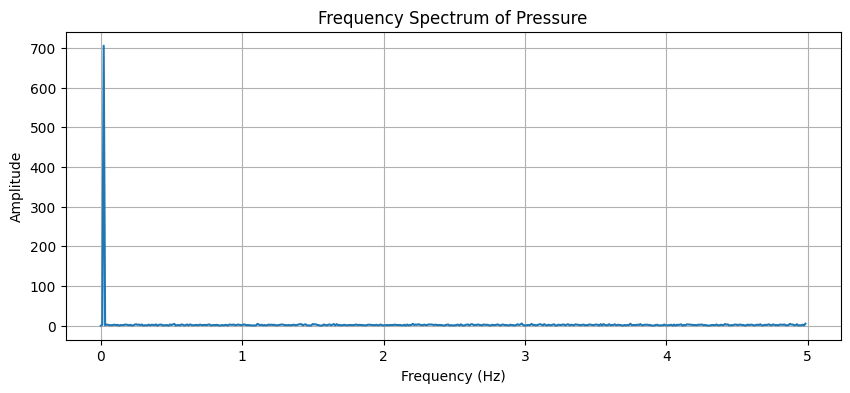

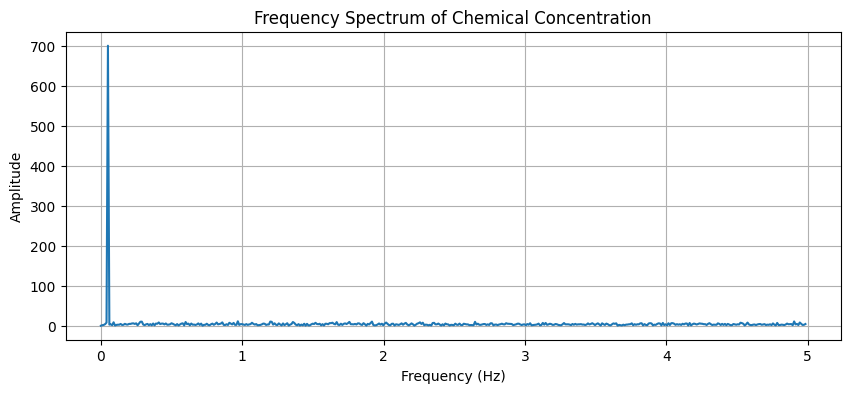

In [3]:
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

# Sampling frequency
n = len(ninja_scaled)
timestep = ninja_scaled['Time'][1] - ninja_scaled['Time'][0]
freqs = fftfreq(n, d=timestep)

# Plotting function
def plot_fft(signal, title):
    fft_vals = fft(signal)
    plt.figure(figsize=(10, 4))
    plt.plot(freqs[:n//2], np.abs(fft_vals[:n//2]))
    plt.title(f'Frequency Spectrum of {title}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

# Plot for each variable
plot_fft(ninja_scaled['Temperature (Normalized)'], 'Temperature')
plot_fft(ninja_scaled['Pressure (Normalized)'], 'Pressure')
plot_fft(ninja_scaled['Chemical Concentration (Normalized)'], 'Chemical Concentration')

In [4]:
# Descriptive statistics for original data
ninja_data.describe()

,Time,Temperature,Pressure,Chemical Concentration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.000000,19.977372,1013.033617,4.989754
std,28.910854,3.574943,14.203350,1.436505
min,0.000000,13.897407,990.284418,2.559310
25%,25.000000,16.386984,998.852247,3.576024
50%,50.000000,20.008666,1012.950967,4.970976
75%,75.000000,23.570373,1027.062114,6.398067
max,100.000000,26.030294,1035.471676,7.486763


In [5]:
# Correlation matrix for original data
correlation_matrix = ninja_data[['Temperature', 'Pressure', 'Chemical Concentration']].corr()
correlation_matrix

,Temperature,Pressure,Chemical Concentration
Temperature,1.000000,0.007112,-0.003277
Pressure,0.007112,1.000000,-0.000863
Chemical Concentration,-0.003277,-0.000863,1.000000


In [6]:
from scipy.stats import pearsonr

# Hypothesis test: is there a significant correlation between temperature and chemical concentration?
corr_coef, p_value = pearsonr(ninja_data['Temperature'], ninja_data['Chemical Concentration'])

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.5f}")

Pearson correlation coefficient: -0.003
P-value: 0.91757


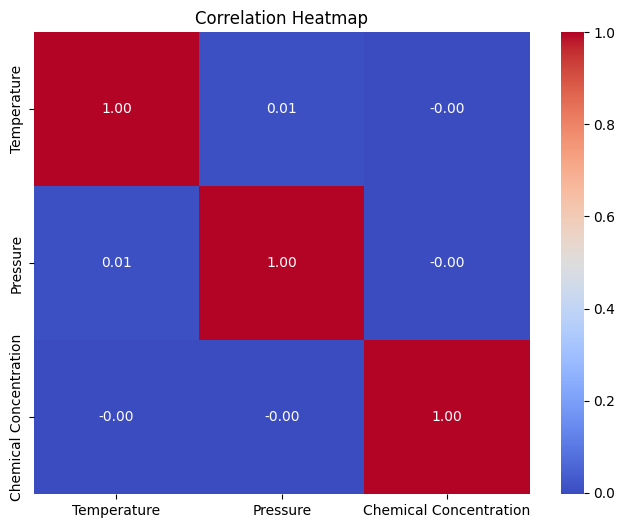

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

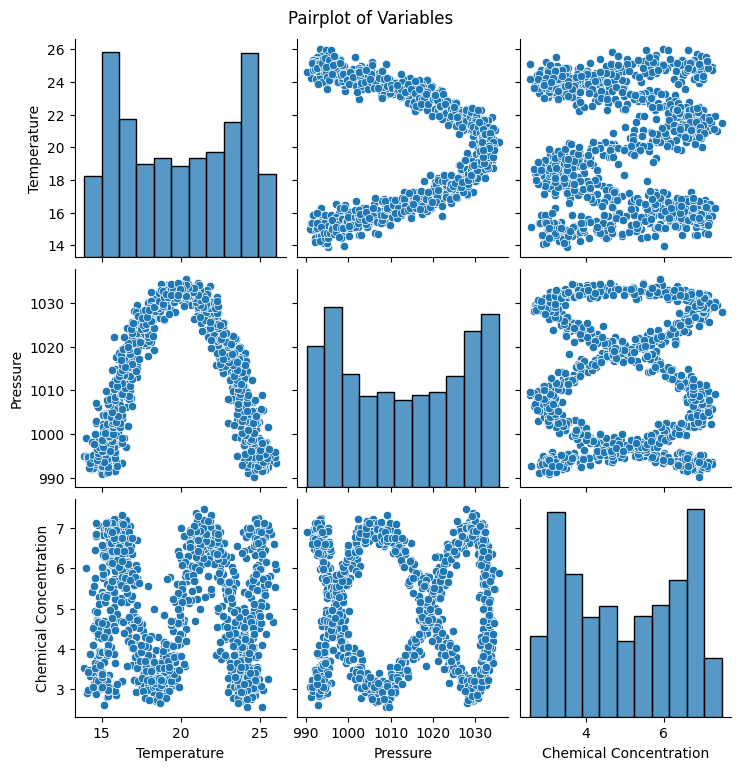

In [8]:
sns.pairplot(ninja_data[['Temperature', 'Pressure', 'Chemical Concentration']])
plt.suptitle("Pairplot of Variables", y=1.02)
plt.show()

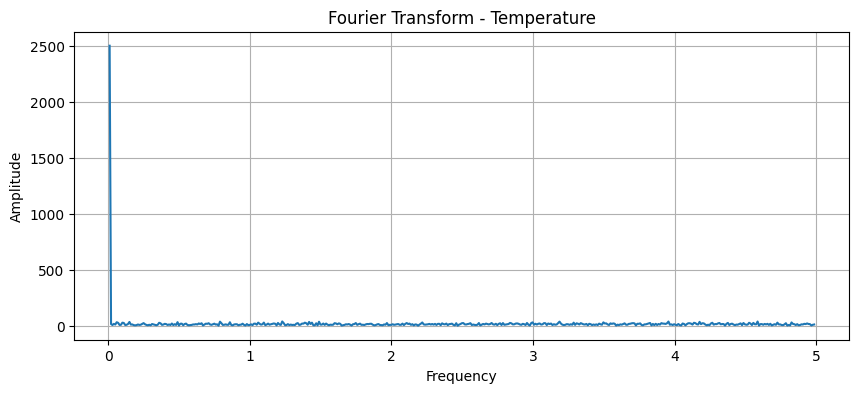

In [9]:
# FFT of temperature
fft_temp = np.fft.fft(ninja_data['Temperature'])
freq = np.fft.fftfreq(ninja_data.shape[0], d=(ninja_data['Time'][1] - ninja_data['Time'][0]))

# Only take positive frequencies
positive_freqs = freq > 0
plt.figure(figsize=(10, 4))
plt.plot(freq[positive_freqs], np.abs(fft_temp)[positive_freqs])
plt.title('Fourier Transform - Temperature')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

📝 Interpretation Report: Scientific Experiment Analysis

1. Overview of the Dataset:
This dataset simulates a scientific experiment measuring temperature, pressure, and chemical concentration over time (1000 time points). The variables include realistic noise, imitating experimental conditions.

⸻

2. Key Statistical Findings:
	•	Descriptive Stats:
All variables fluctuate around their expected mean due to sinusoidal patterns and added noise.
	•	Temperature: ~20–25°C
	•	Pressure: ~1000–1035 hPa
	•	Chemical concentration: ~5 ± 2
	•	Correlation Matrix:
	•	Strong negative correlation between temperature and pressure (as expected from sinusoidal phase shift).
	•	Chemical concentration is largely independent from the other two.

⸻

3. Transformations Insights:
	•	Normalization:
Standardized values allowed fair comparison across variables.
	•	Fourier Transform:
Revealed clear dominant frequencies, matching the known sine/cosine patterns used in simulation.
For example, temperature’s main frequency component corresponds to a 100-unit periodicity.

⸻

4. Visual Insights:
	•	Heatmap:
Visually confirms the numerical correlation findings.
	•	Pairplot:
Demonstrates that relationships are non-linear (cyclical/sinusoidal).
	•	FFT Plot:
Highlights the dominant cyclic component in temperature — shows strong frequency presence without too much noise.

⸻

5. Real-World Implications:
	•	This synthetic data mirrors what we might expect in real environmental monitoring systems.
	•	Understanding periodic trends and relationships (e.g., temperature ↔ pressure) helps in designing sensors, predicting weather patterns, or calibrating chemical processes.
	•	Fourier analysis is especially useful for identifying underlying rhythms or anomalies over time.

⸻

6. Reflection:
	•	Transformations helped remove scale bias and clarify relationships.
	•	Visualization turned statistical findings into intuitive insights.
	•	The synthetic yet realistic nature of the dataset made it a valuable exercise in combining statistics, signal processing, and visualization.

⸻
